# Heuristic Model - fraud

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("data_afterpca.csv")

In [5]:
train_data = df.iloc[:, 1:8]
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.504135,1.058194,-0.183572,0.990869,-1.394134,-2.347328,1.509924
1,12.445919,1.269237,-1.254890,5.890350,-9.966817,-12.340175,21.139496
2,-0.004516,-0.030711,-0.027176,0.008399,-0.011642,-0.003273,0.018293
3,0.017084,0.016384,-0.022218,0.034432,-0.031897,-0.047848,0.007923
4,4.184936,2.945893,-0.336065,2.685241,-4.025931,-7.931928,1.829774


In [6]:
train = train_data.values

In [7]:
train.shape

(1070994, 7)

In [8]:
train = pd.DataFrame(train)

In [9]:
train.head()

,0,1,2,3,4,5,6
0,1.504135,1.058194,-0.183572,0.990869,-1.394134,-2.347328,1.509924
1,12.445919,1.269237,-1.254890,5.890350,-9.966817,-12.340175,21.139496
2,-0.004516,-0.030711,-0.027176,0.008399,-0.011642,-0.003273,0.018293
3,0.017084,0.016384,-0.022218,0.034432,-0.031897,-0.047848,0.007923
4,4.184936,2.945893,-0.336065,2.685241,-4.025931,-7.931928,1.829774


In [10]:
#Calculating Heuristic Z score for each record - Manhattan
manhattan = train.abs()
manhattan_score = manhattan.sum(axis = 1)
#manhattan_score

In [11]:
manhattan_score.shape

(1070994,)

In [12]:
#Calculating Heuristic Z score for each record - Euclidean
euclidean = ((train.abs())**2).sum(axis=1)
euclidean_score = euclidean**(1/2)
euclidean_score.shape

(1070994,)

In [13]:
#Creating DF
manhattan_score = pd.DataFrame(manhattan_score)
euclidean_score = pd.DataFrame(euclidean_score)
fraud_score_HU= pd.concat([manhattan_score,euclidean_score], axis=1)

fraud_score_HU.columns=['Manhattan_Hu_Score','Euclidean_Hu_Score']

In [14]:
fraud_score_HU.insert(0,'Record',fraud_score_HU.index+1)

In [15]:
fraud_score_HU.columns=['Record','Manhattan_Hu_Score','Euclidean_Hu_Score']

In [16]:
fraud_score_HU.head()

,Record,Manhattan_Hu_Score,Euclidean_Hu_Score
0,1,8.988155,3.759141
1,2,64.306884,29.854288
2,3,0.104011,0.047471
3,4,0.177786,0.074894
4,5,23.939767,10.769731


In [17]:
fraud_score_HU['Euclidean_Hu_Rank'] = fraud_score_HU['Euclidean_Hu_Score'].rank(ascending=1)
fraud_score_HU['Manhattan_Hu_Rank'] = fraud_score_HU['Manhattan_Hu_Score'].rank(ascending=1)

In [18]:
fraud_score_HU.head()

,Record,Manhattan_Hu_Score,Euclidean_Hu_Score,Euclidean_Hu_Rank,Manhattan_Hu_Rank
0,1,8.988155,3.759141,1070303.0,1070355.0
1,2,64.306884,29.854288,1070907.0,1070912.0
2,3,0.104011,0.047471,973593.0,980846.0
3,4,0.177786,0.074894,1015991.0,1023899.0
4,5,23.939767,10.769731,1070753.0,1070751.0


In [19]:
fraud_score_HU.to_csv('fraud_ScoreAndRanks_HU.csv',index=False)

## Plotting

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

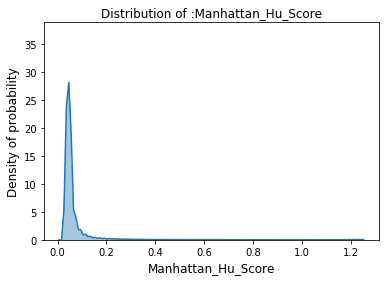

In [23]:
colName='Manhattan_Hu_Score'

xhigh =1.25
#sns.plt.xlim(0,xhigh)

#temp = fraud_score_HU
temp = fraud_score_HU[fraud_score_HU[colName] <= xhigh]


sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

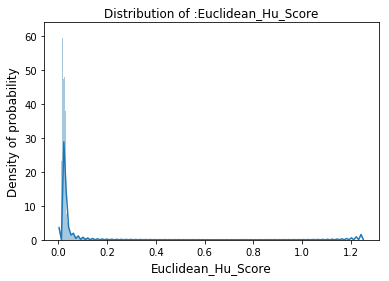

In [24]:
colName='Euclidean_Hu_Score'

xhigh =1.25
#sns.plt.xlim(0,xhigh)

#temp = fraud_score_HU
temp = fraud_score_HU[fraud_score_HU[colName] <= xhigh]


sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()